# Проектная работа 
# Отток клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Исследуйте-баланс-классов" data-toc-modified-id="Исследуйте-баланс-классов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуйте баланс классов</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

**Описание проекта:** из «Бета-Банка» стали регулярно уходить клиенты в небольшом, но заметном количестве. По прогнозам банковских маркетологов - сохранять текущих клиентов дешевле, чем привлекать новых. Для анализа предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цель исследования:** спрогнозировать, уйдёт клиент из банка в ближайшее время или нет (для этого построить модель с предельно большим значением *F1*-меры (довести метрику до 0.59 и проверить ее  на тестовой выборке).

**План работы:**

*изучение и подготовка данных

*преобразование и разделение данных

*обучение моделей без учёта дисбаланса

*исследование баланса классов

*обучение моделей сучетом дисбаланса

*выбор лучшей модели

*проведение тестирования

*вывод и рекомендации



Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Целевой признак**

Exited — факт ухода клиента

## Подготовка данных

In [2]:
# импортируем необходимые библиотеки

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import recall_score

from sklearn.metrics import precision_score

from sklearn.metrics import f1_score

from sklearn.utils import shuffle

import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import roc_auc_score

In [3]:
# Откроем и изучим файл

df = pd.read_csv('/datasets/Churn.csv')

df

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/Churn.csv'

Отметим, что целевой признак относится к задаче бинарной классификации.
Датафрейм состоит из 10 тыс объектов(строк) и 14 признаков (столбцов).

In [ ]:
# выведем на экран информацию о таблице df

df.info()

В столбце Tenure (сколько лет человек является клиентом банка) присутствуют пропущенные значения в количестве 909. Можем предположить, что пропуски в значениях связаны с тем, что клиент обслуживается менее одного целого года. Далее отфильтруем таких клиентов и проанализируем.

Типы данных проверены: числовые значения соответствуют int и float, а нечисловые в дальнейшем преобразуем из категориальных в численные с помощью техники прямого кодирования. 

In [ ]:
# отфильтруем все объекты с пропущенным значением признака "Tenure"

df[df['Tenure'].isna()]

Какой-то бросающейся в глаза зависимости Nan в столбце Tenure не наблюдается. Остановимся на версии, что это нецелые года, и заменим на ноль.

In [ ]:
# заменим на ноль пропущенные значения

df['Tenure'] = df['Tenure'].fillna(0)

# проверим результат работы

df.info()

Пропущенных значений больше нет.

Датафрейм имеет признаки, которые не оказывают влияние на моделирование, поэтому, удалим их.

In [ ]:
# удалим три ненужных признака

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

df

Датафрейм изучен и подготовлен для исследования задачи.

## Исследование задачи

Для использования моделей логистической регрессии, дерева решений и случайного леса - необходимо, чтобы все признаки имели численные значения. Преобразуем с помощью техники OHE, а чтобы не попасть в дамми-ловушку, используем аргумент drop_first.

In [ ]:
# переводим категориальные признаки в числовые

df_ohe = pd.get_dummies(df, drop_first=True)

# выводим на экран размеры датафрейма

display(df_ohe.shape)

# выводим первые пять строк получившегося датафрейма

df_ohe.head()

Количество признаков увеличилось на один.

Подготовим таблицы с признаками и разделим их на обучающую (60%), валидационную (20%) И тестовую (20%) выборки.

In [ ]:
# подготовим таблицы с признаками и целевым признаком

features_ohe = df_ohe.drop('Exited', axis=1)

target_ohe = df_ohe['Exited']


# разобьем данные с признаками и целевым признаком на выборки

# для начала отделим тестовую выборку (20%)

features_train_valid, features_test, target_train_valid, target_test = train_test_split(features_ohe, target_ohe, test_size=0.2, random_state=12345)

# оставшиеся данные разделим на тренировочную и валидационную выборки (test_size=0.25 т.к. 20% / 80% = 0.25)

features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid, test_size=0.25, random_state=12345)


# выведем на экран размеры таблиц

print('размеры таблиц с признаками')

print(features_test.shape)

print(features_train.shape)

print(features_valid.shape)

print('размеры таблиц с целевым признаком')

print(target_test.shape)

print(target_train.shape)

print(target_valid.shape)


Данные разделены успешно, общий размер и соотношение размеров верные.

Далее стандартизируем численные данные, чтобы они приобрели одинаковый масштаб.

In [ ]:
# запишем в переменную список всех численных признаков

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

# создадим объект структуры и настроим его на обучающих данных

scaler = StandardScaler()

scaler.fit(features_train[numeric])

# преобразуем датафрейм

features_train[numeric] = scaler.transform(features_train[numeric])

features_valid[numeric] = scaler.transform(features_valid[numeric])

features_test[numeric] = scaler.transform(features_test[numeric])

# посмотрим, что получилось(выведем на экран датафрейм с обучающими признаками)

display(features_train)

Данные преобразованы, количество данных верное, можем переходить к обучению модели.

In [ ]:
# используем модель логистической регрессии и вычислим метрики качества прогноза целевого класса

# инициализируем модель

model_lr = LogisticRegression(random_state=12345, solver='liblinear')

# обучаем модель

model_lr.fit(features_train, target_train)

# предсказываем ответы по валидационным признакам

predicted_valid_lr = model_lr.predict(features_valid)

# вычисляем показатели качества

print('Полнота:', recall_score(target_valid, predicted_valid_lr))

print('Точность:', precision_score(target_valid, predicted_valid_lr))

f1_lr = f1_score(target_valid, predicted_valid_lr)

print('F1 модели логистической регрессии:', f1_lr)


Показатель полноты низкий, он означает, что модель нашла всего 21 % положительных ответов среди всех. Показатель точности выглядет получше - 58 % объектов, отмеченных моделью, как положительные, на самом деле такие. Показатель F1 меры объединяет эти два показателя, в нашем случае, он имеет низкий показатель 0.31, это означает, что модель нужно перепроверить и починить. Можно попробовать придать объектам редкого класса (класса 1) бОльший вес( сделаем это в дальнейшем).

In [ ]:
# расчитаем еще одну метрику качества - Auc-Roc

# вычислим вероятности классов

probabilities_valid_lr = model_lr.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

# вычислим новую метрику

auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)

print(auc_roc_lr)

Показатель Auc_roc модели логистической регрессии равен 0.77, это больше, чем у случайной модели, но далёк от единицы, поэтому, модель следует улучшить.

Переходим к исследованию задачи с помощью моделей дерева решения и случайного леса.

In [ ]:
# используем модель дерева решений и вычислим метрики качества прогноза целевого класса

# инициализируем модель

model_dt = DecisionTreeClassifier(random_state=12345)

# обучаем модель

model_dt.fit(features_train, target_train)

# предсказываем ответы по валидационным признакам

predicted_valid_dt = model_dt.predict(features_valid)

# вычисляем показатели качества

print('Полнота:', recall_score(target_valid, predicted_valid_dt))

print('Точность:', precision_score(target_valid, predicted_valid_dt))

f1_dt = f1_score(target_valid, predicted_valid_dt)

print('F1 модели дерева решений:', f1_dt)

Показатели получились выше, чем при использовании модели логистической регрессии:  полнота - 0.50, он означает, что модель нашла половину положительных ответов среди всех. Показатель точности - 0.47, т е 47% объектов, отмеченных моделью, как положительные, на самом деле такие. Показатель F1 меры объединяет эти два показателя, в нашем случае он имеет значение 0.48, это означает, что модель нужно перепроверить и починить. Можно попробовать придать объектам редкого класса (класса 1) бОльший вес( сделаем это в следующем пункте).

In [ ]:
# расчитаем еще одну метрику качества - Auc-Roc

# вычислим вероятности классов

probabilities_valid_dt = model_dt.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_dt = probabilities_valid_dt[:, 1]

# вычислим новую метрику

auc_roc_dt = roc_auc_score(target_valid, probabilities_one_valid_dt)

print(auc_roc_dt)

Показатель Auc_roc модели дерева решений равен 0.68, это еще меньше, чем у модели логистической регрессии.

In [ ]:
# используем модель случайного леса и вычислим метрики качества прогноза целевого класса

# инициализируем модель

model_rf = RandomForestClassifier(random_state=12345)

# обучаем модель

model_rf.fit(features_train, target_train)

# предсказываем ответы по валидационным признакам

predicted_valid_rf = model_rf.predict(features_valid)

# вычисляем показатели качества

print('Полнота:', recall_score(target_valid, predicted_valid_rf))

print('Точность:', precision_score(target_valid, predicted_valid_rf))

f1_rf = f1_score(target_valid, predicted_valid_rf)

print('F1 модели случайного леса:', f1_rf)

Показатели при использовании случайного леса:  полнота - 0.46, он означает, что модель нашла 46 % положительных ответов среди всех. Показатель точности - 0.74, т.е. 74% объектов, отмеченных моделью, как положительные, на самом деле такие. Показатель F1 меры объединяет эти два показателя, в нашем случае он имеет показатель 0.57, что является недостаточным. Можно попробовать придать объектам редкого класса (класса 1) бОльший вес( сделаем это в следующем пункте).

In [ ]:
# расчитаем еще одну метрику качества - Auc-Roc

# вычислим вероятности классов

probabilities_valid_rf = model_rf.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_rf = probabilities_valid_rf[:, 1]

# вычислим новую метрику

auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid_rf)

print(auc_roc_rf)

Самый высокий показатель Auc_roc получился у модели случайного леса и составляет 0.85, это неплохой показатель.

**По результатам обучения моделей, наилучший результат F1-меры и Auc_Roc получился при использовании модели случайного леса**.

## Исследуйте баланс классов

Далее проверим, как часто в целевом признаке встречается класс "1" или "0".

In [ ]:
# подсчитаем классы в целевом признаке

class_frequency = target_ohe.value_counts(normalize=True)

print(class_frequency)

# построим график

class_frequency.plot(kind='bar')


Доля  ушедших клиентов составляет 20,37 %, а доля оставшихся почти в 4 раза больше, классы не являются сбалансированными, учтем это при дальнейшем обучении моделей, т.е. обучим с учетом сбалансированности.

## Борьба с дисбалансом

In [ ]:
# добавим аргумент class_weight = 'balanced' при инициализации модели логистической регрессии

model_lr_balance = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced')

model_lr_balance.fit(features_train, target_train)

predicted_valid_lr_balance = model_lr_balance.predict(features_valid)

print('Полнота:', recall_score(target_valid, predicted_valid_lr_balance))

print('Точность:', precision_score(target_valid, predicted_valid_lr_balance))

f1_lr_balance = f1_score(target_valid, predicted_valid_lr_balance)

print('F1 модели логистической регрессии при использовании аргумента balanced:', f1_lr_balance)

Придав объектам редкого класса бОльший вес, мы значительно увеличили показатель полноты - 0.68, но уменьшили показатель точности - 0.37 (увеличилось количество ложноположительных результатов). Модель нашла 68 % положительных ответов среди всех; 37 % объектов, отмеченных моделью, как положительные, на самом деле такие. Показатель F1 меры увеличился до 0.48. 

In [ ]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_valid_lr_balance = model_lr_balance.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_lr_balance = probabilities_valid_lr_balance[:, 1]

# вычислим новую метрику

auc_roc_lr_balance = roc_auc_score(target_valid, probabilities_one_valid_lr_balance)

print(auc_roc_lr_balance)

Auc-Roc сбалансированной модели логистической регрессии составляет 0.77, столько же, сколько до сбалансированности.

In [ ]:
# добавим аргумент class_weight = 'balanced' при инициализации модели дерева решений

model_dt_balance = DecisionTreeClassifier(random_state=12345, class_weight = 'balanced')

model_dt_balance.fit(features_train, target_train)

predicted_valid_dt_balance = model_dt_balance.predict(features_valid)

print('Полнота:', recall_score(target_valid, predicted_valid_dt_balance))

print('Точность:', precision_score(target_valid, predicted_valid_dt_balance))

f1_dt_balance = f1_score(target_valid, predicted_valid_dt_balance)

print('F1 модели дерева решений при использовании аргумента balanced:', f1_dt_balance)

Придав объектам редкого класса бОльший вес, мы снизили показатель полноты - 0.44 (увеличилось количество ложноотрицательных ответов), а показатель точности остался прежним - 0.47. Модель нашла 44 % положительных ответов среди всех; 47 % объектов, отмеченных моделью, как положительные, на самом деле такие. Показатель F1 меры снизился до 0.45. 

In [ ]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_valid_dt_balance = model_dt_balance.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_dt_balance = probabilities_valid_dt_balance[:, 1]

# вычислим новую метрику

auc_roc_dt_balance = roc_auc_score(target_valid, probabilities_one_valid_dt_balance)

print(auc_roc_dt_balance)

Auc-Roc сбалансированной модели дерева решений составляет 0.66, это меньше, чем до сбалансированности.

In [ ]:
# добавим аргумент class_weight = 'balanced' при инициализации модели случайного леса

model_rf_balance = RandomForestClassifier(random_state=12345, class_weight = 'balanced')

model_rf_balance.fit(features_train, target_train)

predicted_valid_rf_balance = model_rf_balance.predict(features_valid)

print('Полнота:', recall_score(target_valid, predicted_valid_rf_balance))

print('Точность:', precision_score(target_valid, predicted_valid_rf_balance))

f1_rf_balance = f1_score(target_valid, predicted_valid_rf_balance)

print('F1 модели случайного леса при использовании аргумента balanced:', f1_rf_balance)

Придав объектам редкого класса бОльший вес, мы снизили показатель полноты - 0.43 (увеличилось количество ложноотрицательных ответов), а показатель точности немного увеличился - 0.77 (уменьшилось количество ложноположительных результатов). Таким образом, модель нашла 43 % положительных ответов среди всех; 77 % объектов, отмеченных моделью, как положительные, на самом деле такие. Показатель F1 меры снизился до 0.55. 

In [ ]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_valid_rf_balance = model_rf_balance.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_rf_balance = probabilities_valid_rf_balance[:, 1]

# вычислим новую метрику

auc_roc_rf_balance = roc_auc_score(target_valid, probabilities_one_valid_rf_balance)

print(auc_roc_rf_balance)

Auc-Roc сбалансированной модели случайного леса составляет 0.85, показатель не изменился.

Борьба с дисбалансом с использованием аргумента balanced незначительно улучшила результат только у модели логистической регресии. Далее попробуем использовать техники увеличения и уменьшения выборки.

C помощью техники upsampling увеличим выборку редкого класса.

Для этого разделим выборки на отрицательные и положительные объекты, увеличим количество редкого класса, перемешаем данные.

In [ ]:
# разделим обучающую выборку на отрицательные и положительные объекты:

features_train_zeros = features_train[target_train == 0]

features_train_ones = features_train[target_train == 1]

target_train_zeros = target_train[target_train == 0]

target_train_ones = target_train[target_train == 1]


In [ ]:
# вспомним, какой класс у нас является редким 

target_train.value_counts()

Класс 1 (уход клиента) является редким. Поэтому будем увеличивать выборку этого класса.

In [ ]:
# расчитаем необходимое значение показателя repeat(повторов):

repeat = float(len(features_train_zeros) / len(features_train_ones))

repeat = round(repeat)

repeat

In [ ]:
# продублируем объекты положительного класса и объединим их с объектами отрицательного класса

features_upsampled = pd.concat([features_train_zeros] + [features_train_ones] * repeat)

target_upsampled = pd.concat([target_train_zeros] + [target_train_ones] * repeat)

# посмотрим, что получилось

target_upsampled.value_counts()


Количество данных максимально сравнялось.

In [ ]:
# перемешаем данные

features_upsampled = shuffle(features_upsampled, random_state=12345)

target_upsampled = shuffle(target_upsampled, random_state=12345)

In [ ]:
# обучим на новых данных модель LogisticRegression

model_lr_up = LogisticRegression(random_state=12345, solver='liblinear')

model_lr_up.fit(features_upsampled, target_upsampled)

predicted_valid_lr_up = model_lr_up.predict(features_valid)

print('Полнота:', recall_score(target_valid, predicted_valid_lr_up))

print('Точность:', precision_score(target_valid, predicted_valid_lr_up))

f1_lr_up = f1_score(target_valid, predicted_valid_lr_up)

print('F1 модели логистической регрессии при применении техники upsampling:', f1_lr_up)

Совсем незначительно увеличился показатель полноты, а точность и показатель F1-меры такой же, как при применении class_weight = 'balanced'.

In [ ]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_valid_lr_up = model_lr_up.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_lr_up = probabilities_valid_lr_up[:, 1]

# вычислим новую метрику

auc_roc_lr_up = roc_auc_score(target_valid, probabilities_one_valid_lr_up)

print(auc_roc_lr_up)

Auc-Roc модели логистической регрессии при применении техники upsampling составляет 0.77, столько же, то есть сохраняется на том же уровне.  

C помощью техники upsampling увеличим выборку редкого класса для модели дерева решений.

In [ ]:
# обучим на новых данных модель DecisionTreeClassifier

model_dt_up = DecisionTreeClassifier(random_state=12345)

model_dt_up.fit(features_upsampled, target_upsampled)

predicted_valid_dt_up = model_dt_up.predict(features_valid)

print('Полнота:', recall_score(target_valid, predicted_valid_dt_up))

print('Точность:', precision_score(target_valid, predicted_valid_dt_up))

f1_dt_up = f1_score(target_valid, predicted_valid_dt_up)

print('F1 модели дерева решений при применении техники upsampling:', f1_dt_up)

При увеличении выборки техникой upsampling немного увеличился показатель полноты (что означает, что модель стала находить меньше ложноотрицательных значений), точность осталась на том же уровне, что и при применении аргумента balanced, а f1-мера немного больше, чем при использовании balanced, но меньше, чем до придания редкому классу бОльшего веса.

In [ ]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_valid_dt_up = model_dt_up.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_dt_up = probabilities_valid_dt_up[:, 1]

# вычислим новую метрику

auc_roc_dt_up = roc_auc_score(target_valid, probabilities_one_valid_dt_up)

print(auc_roc_dt_up)

Auc-Roc модели дерева решений при применении техники upsampling составляет 0.66, это столько же, сколько после сбалансированности, и меньше, чем до сбалансированности.  

Для модели случайного леса применим технику уменьшения выборки - downsampling.

In [ ]:
# создадим функцию, которая берем в качестве аргументов: признаки и целевой признак, а также долю 
# более популярного класса

def downsample(features, target, fraction):
    
    features_zeros = features[target == 0]

    features_ones = features[target == 1]

    target_zeros = target[target == 0]

    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
        
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)

    target_downsampled = shuffle(target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
    

# применим функцию к обучающим признакам, а доля в нашем случае составит 0,25 ( 1 / 4)    
    
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
        

In [ ]:
# обучим на новых данных модель RandomForestClassifier

model_rf_down = RandomForestClassifier(random_state=12345)

model_rf_down.fit(features_downsampled, target_downsampled)

predicted_valid_rf_down = model_rf_down.predict(features_valid)

print('Полнота:', recall_score(target_valid, predicted_valid_rf_down))

print('Точность:', precision_score(target_valid, predicted_valid_rf_down))

f1_rf_down = f1_score(target_valid, predicted_valid_rf_down)

print('F1 модели случайного леса при использовании техники downsampling:', f1_rf_down)

При уменьшении выборки техникой downsampling (по сравнению с применением аргумента balanced) значительно увеличился показатель полноты (что означает, что модель стала находить меньше ложноотрицательных значений), но точность значительно уменьшилась (значит модель стала находить больше ложноположительных значений, а f1-мера остался на том же уровне, что и при использовании balanced, но меньше, чем до придания редкому классу бОльшего веса.

In [ ]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_valid_rf_down = model_rf_down.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_valid_rf_down = probabilities_valid_rf_down[:, 1]

# вычислим новую метрику

auc_roc_rf_down = roc_auc_score(target_valid, probabilities_one_valid_rf_down)

print(auc_roc_rf_down)

Auc-Roc модели случайного леса при применении техники downsampling составляет 0.84, это немного меньше, чем после сбалансированности и  до сбалансированности.

Таким образом, самые высокие показатели **f1-Мера и Auc_Roc мы имеем при использовании модели случайного леса без применения сбалансированности классов**. Попробуем у данной модели поработать с гиперпараметрами.

In [ ]:
# в цикле переберем различное количество деревьев от 1 до 20 и глубину дерева от 1 до 10, и выберем лучшую модель

best_model_forest = None

best_result = 0

best_est = 0

best_depth = 0

for est in range(1, 21):
    
    for depth in range (1, 11):
    
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
    
        model_forest.fit(features_train, target_train)
        
        predicted_forest = model_forest.predict(features_valid)
    
        result = f1_score(target_valid, predicted_forest)
    
        if result > best_result:
        
            best_model_forest = model_forest
        
            best_result = result
        
            best_est = est
            
            best_depth = depth

print('F1-мера наилучшей модели случайного леса решений на валидационной выборке:', best_result)

print('Количество деревьев наилучшей модели случайного леса решений на валидационной выборке:', best_est)

print('Глубина дерева наилучшей модели случайного леса решений на валидационной выборке:', best_depth)


In [ ]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_forest = model_forest.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_forest = probabilities_forest[:, 1]

# вычислим новую метрику

auc_roc_forest = roc_auc_score(target_valid, probabilities_one_forest)

print(auc_roc_forest)

Показатель F1-меры и Auc_roc снизились, увеличим количество деревьев.

In [ ]:
%%time

# в цикле переберем различное количество деревьев от 1 до 50 и глубину дерева от 1 до 10, и выберем лучшую модель

best_model_forest = None

best_result = 0

best_est = 0

best_depth = 0

for est in range(1, 51):
    
    for depth in range (1, 11):
    
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
    
        model_forest.fit(features_train, target_train)
        
        predicted_forest = model_forest.predict(features_valid)
    
        result = f1_score(target_valid, predicted_forest)
    
        if result > best_result:
        
            best_model_forest = model_forest
        
            best_result = result
        
            best_est = est

            best_depth = depth

print('F1-мера наилучшей модели случайного леса решений на валидационной выборке:', best_result)

print('Количество деревьев наилучшей модели случайного леса решений на валидационной выборке:', best_est)

print('Глубина дерева наилучшей модели случайного леса решений на валидационной выборке:', best_depth)


In [ ]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_forest = model_forest.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_forest = probabilities_forest[:, 1]

# вычислим новую метрику

auc_roc_forest = roc_auc_score(target_valid, probabilities_one_forest)

print(auc_roc_forest)

Положительные изменения недостаточны, в качестве эксперимента пробовала увеличить количество деревьев до 100 и глубину до 20. Это также не дало нужных результатов (из проекта эти расчеты удалила, т к занимают очень много времени). Оставим пока данную модель, попробуем улучшить модель логистической регрессии.

In [ ]:
# измененим порог вероятности  модели логистической регрессии с аргументом balanced.

model_lr_balance_threshold = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced')

model_lr_balance_threshold.fit(features_train, target_train)

probabilities_valid = model_lr_balance_threshold.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.7, 0.02):
    
    predicted_valid_lr_threshold = model_lr_balance_threshold.predict(features_valid)
    
    predicted_valid_lr_threshold = probabilities_one_valid > threshold

print('Полнота:', recall_score(target_valid, predicted_valid_lr_threshold))

print('Точность:', precision_score(target_valid, predicted_valid_lr_threshold))

f1_lr_threshold = f1_score(target_valid, predicted_valid_lr_threshold)

print('F1 модели логистической регрессии при использовании аргумента balanced и изменении порога:', f1_lr_threshold)

In [ ]:
# расчитаем Auc-Roc

auc_roc_lr_threshold = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc_lr_threshold)

Показатели снизились, вариант не подходит.

In [ ]:
# используем модель дерева решений и переберем в цикле глубину дерева от 1 до 10 

best_model_dt_depth = None

best_result = 0

best_depth = 0
    
for depth in range(1, 11):
    
    model_dt_depth = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight = 'balanced')
    
    model_dt_depth.fit(features_train, target_train)
        
    predicted_dt_depth = model_dt_depth.predict(features_valid)
    
    result = f1_score(target_valid, predicted_dt_depth)
    
    if result > best_result:
        
            best_model_dt_depth = model_dt_depth
        
            best_result = result

            best_depth = depth


print('Полнота:', recall_score(target_valid, predicted_dt_depth))

print('Точность:', precision_score(target_valid, predicted_dt_depth))

f1_dt_depth = f1_score(target_valid, predicted_dt_depth)

print('F1 модели дерева решений:', f1_dt_depth)


In [ ]:
# используем модель дерева решений и переберем в цикле глубину дерева от 1 до 50 

best_model_dt_depth = None

best_result = 0

best_depth = 0
    
for depth in range(1, 51):
    
    model_dt_depth = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight = 'balanced')
    
    model_dt_depth.fit(features_train, target_train)
        
    predicted_dt_depth = model_dt_depth.predict(features_valid)
    
    result = f1_score(target_valid, predicted_dt_depth)
    
    if result > best_result:
        
            best_model_dt_depth = model_dt_depth
        
            best_result = result

            best_depth = depth


print('Полнота:', recall_score(target_valid, predicted_dt_depth))

print('Точность:', precision_score(target_valid, predicted_dt_depth))

f1_dt_depth = f1_score(target_valid, predicted_dt_depth)

print('F1 модели дерева решений:', f1_dt_depth)


In [42]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_dt_depth = model_dt_depth.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_dt_depth = probabilities_dt_depth[:, 1]

# вычислим новую метрику

auc_roc_dt_depth = roc_auc_score(target_valid, probabilities_one_dt_depth)

print(auc_roc_dt_depth)

0.6576649250777675


Показатели снизились, вариант не подходит.

Попробуем вернуться к модели случайного леса, сбалансировать классы и перебрать количество деревьев от 1 до 50 и глубину от 1 до 10.

In [43]:
%%time

best_model_forest_balance = None

best_result = 0

best_est = 0

best_depth = 0

for est in range(1, 51):
    
    for depth in range (1, 11):
    
        model_forest_balance = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight = 'balanced')
    
        model_forest_balance.fit(features_train, target_train)
        
        predicted_forest_balance = model_forest_balance.predict(features_valid)
    
        result = f1_score(target_valid, predicted_forest_balance)
    
        if result > best_result:
        
            best_model_forest_balance = model_forest
        
            best_result = result
        
            best_est = est

            best_depth = depth

print('F1-мера наилучшей модели случайного леса решений на валидационной выборке:', best_result)

print('Количество деревьев наилучшей модели случайного леса решений на валидационной выборке:', best_est)

print('Глубина дерева наилучшей модели случайного леса решений на валидационной выборке:', best_depth)


F1-мера наилучшей модели случайного леса решений на валидационной выборке: 0.5959079283887468
Количество деревьев наилучшей модели случайного леса решений на валидационной выборке: 41
Глубина дерева наилучшей модели случайного леса решений на валидационной выборке: 10
CPU times: user 54 s, sys: 273 ms, total: 54.2 s
Wall time: 54.3 s


In [44]:
# расчитаем Auc-Roc

# вычислим вероятности классов

probabilities_forest_balance = model_forest_balance.predict_proba(features_valid)

# выберем вероятности положительного класса

probabilities_one_forest_balance = probabilities_forest_balance[:, 1]

# вычислим новую метрику

auc_roc_forest_balance = roc_auc_score(target_valid, probabilities_one_forest_balance)

print(auc_roc_forest_balance)

0.8518992432274339


Желаемый результат достигнут, F1-мера увеличена почти до 0.6. Auc_roc составляет 0.85, это неплохой результат.

Осталось протестировать модель.

## Тестирование модели

In [45]:
# запишем в лучшую модель - модель случайного леса с учетом сбалансированности классов и подобранных гиперпараметров 

best_model = RandomForestClassifier(random_state=12345, n_estimators=41, max_depth=10, class_weight = 'balanced')
    
best_model.fit(features_train, target_train)
    
predicted_best_model = best_model.predict(features_test)
    
result_test = f1_score(target_test, predicted_best_model)

result_test
    

0.632086851628468

Результат тестирования получился выше, чем у случайной модели и немного выше, чем на валидационной выборке.

In [46]:
# расчитаем еще одну метрику качества - Auc-Roc

# вычислим вероятности классов

probabilities_valid_best = best_model.predict_proba(features_test)

# выберем вероятности положительного класса

probabilities_one_valid = probabilities_valid_best[:, 1]

# вычислим метрику

auc_roc_best = roc_auc_score(target_test, probabilities_one_valid)

print(auc_roc_best)

0.861658460764273


Показатель получился лучше, чем у случайной модели (больше 0,5) и незначительно выше, чем на валидационной выборке.

Выведем важность признаков, влияющих на целевой признак.

,feature,importance
0,Age,0.309281
1,NumOfProducts,0.175433
2,Balance,0.125463
3,EstimatedSalary,0.097622
4,CreditScore,0.086250
5,IsActiveMember,0.059097
6,Geography_Germany,0.051317
7,Tenure,0.048219
8,Gender_Male,0.025378
9,HasCrCard,0.011769


<AxesSubplot:title={'center':'График важности признаков'}>

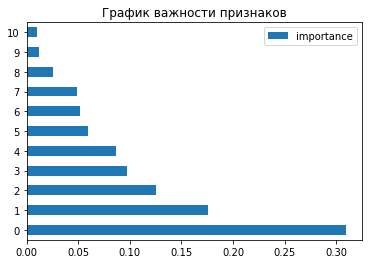

In [48]:
# в виде таблицы

importances = best_model.feature_importances_

feature_list = list(features_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

display(feature_results)

# в виде графика

feature_results.plot.barh(title='График важности признаков')

Отметим, что при моделировании главным фактором стал возраст клиента, а наименее важным - наличие кредитной карты.

## Вывод

Лучшей моделью для предсказания, уйдет клиент или останется, стала модель случайного леса с сбалансированными классами, с количеством деревьев 41 и глубиной дерева 10. Метрика доведена более, чем 0.59 и проверена на тестовой выборке (результаты на тестовой выборке близки к результатам на валидационной выборке), модель обучилась хорошо.
Самым важным фактором, влияющим на целевой признак, является возраст клиента.
Хотелось бы порекомендовать заказчику перепроверить данные в столбце Tenure и причину, почему часть значений пропущены.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*